In [2]:
import mne
import mne_bids
from mne_bids import BIDSPath
from mne_bids import print_dir_tree, make_report, find_matching_paths, get_entity_vals, read_raw_bids

In [3]:
path = './openneuro-aws/ds004276-download/'
path_fif = './openneuro-aws/ds004276-download/sub-001/meg/sub-001_task-words_meg.fif'
bids_path = BIDSPath(
                subject='001', 
                root=path, 
                task='words',
                datatype='meg', 
                run='01', 
                suffix='meg', 
                extension='.fif'
            )
print_dir_tree(path, max_depth=4)


|ds004276-download/
|--- .gitattributes
|--- CHANGES
|--- README
|--- annex-uuid
|--- dataset_description.json
|--- participants.json
|--- participants.tsv
|--- .datalad/
|------ config
|--- sub-000/
|------ meg/
|--- sub-001/
|------ sub-001_scans.tsv
|------ beh/
|--------- sub-001_task-words_beh.tsv
|------ meg/
|--------- sub-001_coordsystem.json
|--------- sub-001_task-words_channels.tsv
|--------- sub-001_task-words_events.tsv
|--------- sub-001_task-words_meg.fif
|--------- sub-001_task-words_meg.json
|--- sub-0010/
|------ meg/
|--- sub-0011/
|------ meg/
|--- sub-0012/
|------ meg/
|--- sub-0013/
|------ meg/
|--- sub-0014/
|------ meg/
|--- sub-0015/
|------ meg/
|--- sub-0016/
|------ meg/
|--- sub-0017/
|------ meg/
|--- sub-0018/
|------ meg/
|--- sub-002/
|------ sub-002_scans.tsv
|------ beh/
|--------- sub-002_task-words_beh.tsv
|------ meg/
|--------- sub-002_coordsystem.json
|--------- sub-002_task-words_channels.tsv
|--------- sub-002_task-words_events.tsv
|---------

In [4]:
# report a summary of the available data
print(make_report(path))

Summarizing participants.tsv ./openneuro-aws/ds004276-download/participants.tsv...
Summarizing scans.tsv files [PosixPath('openneuro-aws/ds004276-download/sub-018/sub-018_scans.tsv'), PosixPath('openneuro-aws/ds004276-download/sub-007/sub-007_scans.tsv'), PosixPath('openneuro-aws/ds004276-download/sub-006/sub-006_scans.tsv'), PosixPath('openneuro-aws/ds004276-download/sub-014/sub-014_scans.tsv'), PosixPath('openneuro-aws/ds004276-download/sub-005/sub-005_scans.tsv'), PosixPath('openneuro-aws/ds004276-download/sub-010/sub-010_scans.tsv'), PosixPath('openneuro-aws/ds004276-download/sub-003/sub-003_scans.tsv'), PosixPath('openneuro-aws/ds004276-download/sub-017/sub-017_scans.tsv'), PosixPath('openneuro-aws/ds004276-download/sub-001/sub-001_scans.tsv'), PosixPath('openneuro-aws/ds004276-download/sub-009/sub-009_scans.tsv'), PosixPath('openneuro-aws/ds004276-download/sub-011/sub-011_scans.tsv'), PosixPath('openneuro-aws/ds004276-download/sub-016/sub-016_scans.tsv'), PosixPath('openneuro-aws

The participant template found: comprised of 9 male and 9 female participants;
comprised of 18 right hand, 0 left hand and 0 ambidextrous;
ages ranged from 18.0 to 30.0 (mean = 20.89, std = 2.64; 1 with unknown age)
 The Auditory single word recognition in MEG dataset was created by Phoebe
Gaston, Christian Brodbeck, Colin Phillips, and Ellen Lau and conforms to BIDS
version 1.6.0. This report was generated with MNE-BIDS
(https://doi.org/10.21105/joss.01896). The dataset consists of 18 participants
(comprised of 9 male and 9 female participants; comprised of 18 right hand, 0
left hand and 0 ambidextrous; ages ranged from 18.0 to 30.0 (mean = 20.89, std =
2.64; 1 with unknown age)) . Data was recorded using an MEG system (Elekta)
sampled at 1000.0 Hz with line noise at 60.0 Hz. The following software filters
were applied during recording: SpatialCompensation. There were 19 scans in
total. Recording durations ranged from 945.0 to 1481.0 seconds (mean = 1037.39,
std = 116.42), for a total

In [5]:
datatype = 'meg'
extensions = [".tsv"]  
bids_paths = find_matching_paths(path, datatypes=datatype, extensions=extensions)

In [6]:
bids_path = BIDSPath(root=path, datatype=datatype)
print(bids_path.match(ignore_json=True))

[BIDSPath(
root: openneuro-aws/ds004276-download
datatype: meg
basename: sub-001_task-words_channels.tsv), BIDSPath(
root: openneuro-aws/ds004276-download
datatype: meg
basename: sub-001_task-words_events.tsv), BIDSPath(
root: openneuro-aws/ds004276-download
datatype: meg
basename: sub-001_task-words_meg.fif), BIDSPath(
root: openneuro-aws/ds004276-download
datatype: meg
basename: sub-002_task-words_channels.tsv), BIDSPath(
root: openneuro-aws/ds004276-download
datatype: meg
basename: sub-002_task-words_events.tsv), BIDSPath(
root: openneuro-aws/ds004276-download
datatype: meg
basename: sub-002_task-words_meg.fif), BIDSPath(
root: openneuro-aws/ds004276-download
datatype: meg
basename: sub-003_task-words_channels.tsv), BIDSPath(
root: openneuro-aws/ds004276-download
datatype: meg
basename: sub-003_task-words_events.tsv), BIDSPath(
root: openneuro-aws/ds004276-download
datatype: meg
basename: sub-003_task-words_meg.fif), BIDSPath(
root: openneuro-aws/ds004276-download
datatype: meg
base

In [7]:
# get the raw file of the first subject
task = 'words'
suffix = 'meg'
subject = '008'

bids_path_subject = bids_path.update(subject=subject, task=task, suffix=suffix)
print(bids_path_subject)

openneuro-aws/ds004276-download/sub-008/meg/sub-008_task-words_meg.fif


In [8]:
# get the raw data
raw = read_raw_bids(bids_path=bids_path_subject, verbose=True)

Opening raw data file openneuro-aws/ds004276-download/sub-008/meg/sub-008_task-words_meg.fif...
    Range : 0 ... 1051999 =      0.000 ...  1051.999 secs
Ready.
Reading events from openneuro-aws/ds004276-download/sub-008/meg/sub-008_task-words_events.tsv.
Reading channel info from openneuro-aws/ds004276-download/sub-008/meg/sub-008_task-words_channels.tsv.


/tmp/ipykernel_10959/643655223.py:2: RuntimeWarning: The unit for channel(s) MISC 001, MISC 002, MISC 003, MISC 004, MISC 005, MISC 006, MISC 007, MISC 008, MISC 009, MISC 010, MISC 011, MISC 012, MISC 013, MISC 014, MISC 015, MISC 016, MISC 017, MISC 018, MISC 019, MISC 020, MISC 021, MISC 022, MISC 023, MISC 024, MISC 025, MISC 026, MISC 027, MISC 028, MISC 029, MISC 030, MISC 031, MISC 032 has changed from V to NA.
  raw = read_raw_bids(bids_path=bids_path_subject, verbose=True)
/tmp/ipykernel_10959/643655223.py:2: RuntimeWarning: The unit for channel(s) STI 014 has changed from NA to V.
  raw = read_raw_bids(bids_path=bids_path_subject, verbose=True)


In [9]:
# get some info in the raw data
print(raw.info['subject_info'])
print(raw.info['meas_date'])
print(raw.info['sfreq'])
print(raw.info['line_freq']) # power line frequency
print(raw.info['lowpass']) # lowpass filter
print(raw.info['highpass']) # highpass filter
print(raw.info['bads']) # bad channels
print(raw.info['description']) # description of the data
print(raw.info['dig']) # digitization points
print(raw.annotations) # annotations

{'his_id': 'sub-008', 'age': '20', 'sex': 1, 'hand': 1}
2019-11-22 20:49:18+00:00
1000.0
60.0
200.0
0.0
['MEG 056']
Anonymized using a time shift to preserve age at acquisition
[<DigPoint |        LPA : (-74.8, 0.0, 0.0) mm      : head frame>, <DigPoint |     Nasion : (0.0, 108.5, 0.0) mm      : head frame>, <DigPoint |        RPA : (74.8, 0.0, 0.0) mm       : head frame>, <DigPoint |     HPI #1 : (-70.8, 6.7, -7.2) mm     : head frame>, <DigPoint |     HPI #2 : (73.2, 11.3, -2.9) mm     : head frame>, <DigPoint |     HPI #3 : (9.7, 118.7, 39.1) mm     : head frame>, <DigPoint |     HPI #4 : (-30.3, 110.5, 40.6) mm   : head frame>, <DigPoint |     HPI #5 : (45.3, 106.3, 41.8) mm    : head frame>, <DigPoint |   Extra #1 : (-19.4, 58.7, 131.0) mm   : head frame>, <DigPoint |   Extra #2 : (-18.2, 59.2, 131.0) mm   : head frame>, <DigPoint |   Extra #3 : (-16.5, 58.5, 132.5) mm   : head frame>, <DigPoint |   Extra #4 : (-14.8, 58.4, 132.7) mm   : head frame>, <DigPoint |   Extra #5 : (-11.

In [10]:
print(raw.info['nchan'])  # Prints the number of channels
print(raw.n_times)  # Prints the number of time points

193
1052000


In [11]:
# events
from mne_bids.stats import count_events
count_events(path).iloc[0]

       trial_type     
words  item               903
       item_post_probe     97
       no_probe            48
       yes_probe           49
Name: 001, dtype: int64

<Axes: xlabel='subject'>

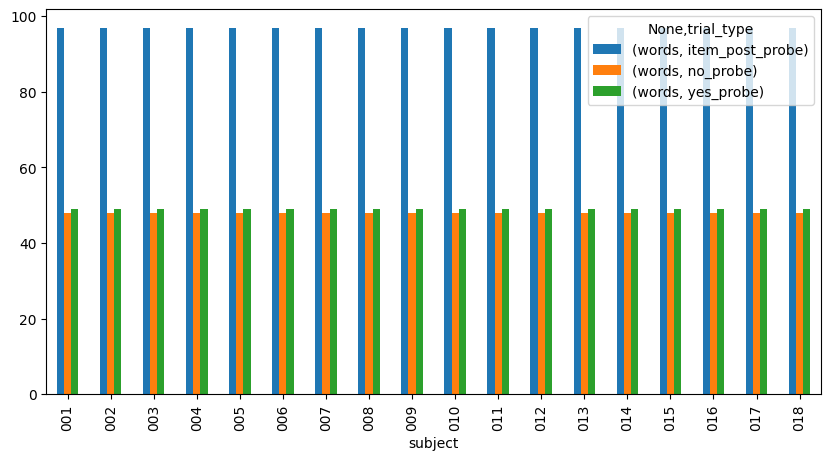

In [12]:
count_events(path)[count_events(path).keys()[1:]].plot(kind='bar', figsize=(10, 5))

Using matplotlib as 2D backend.


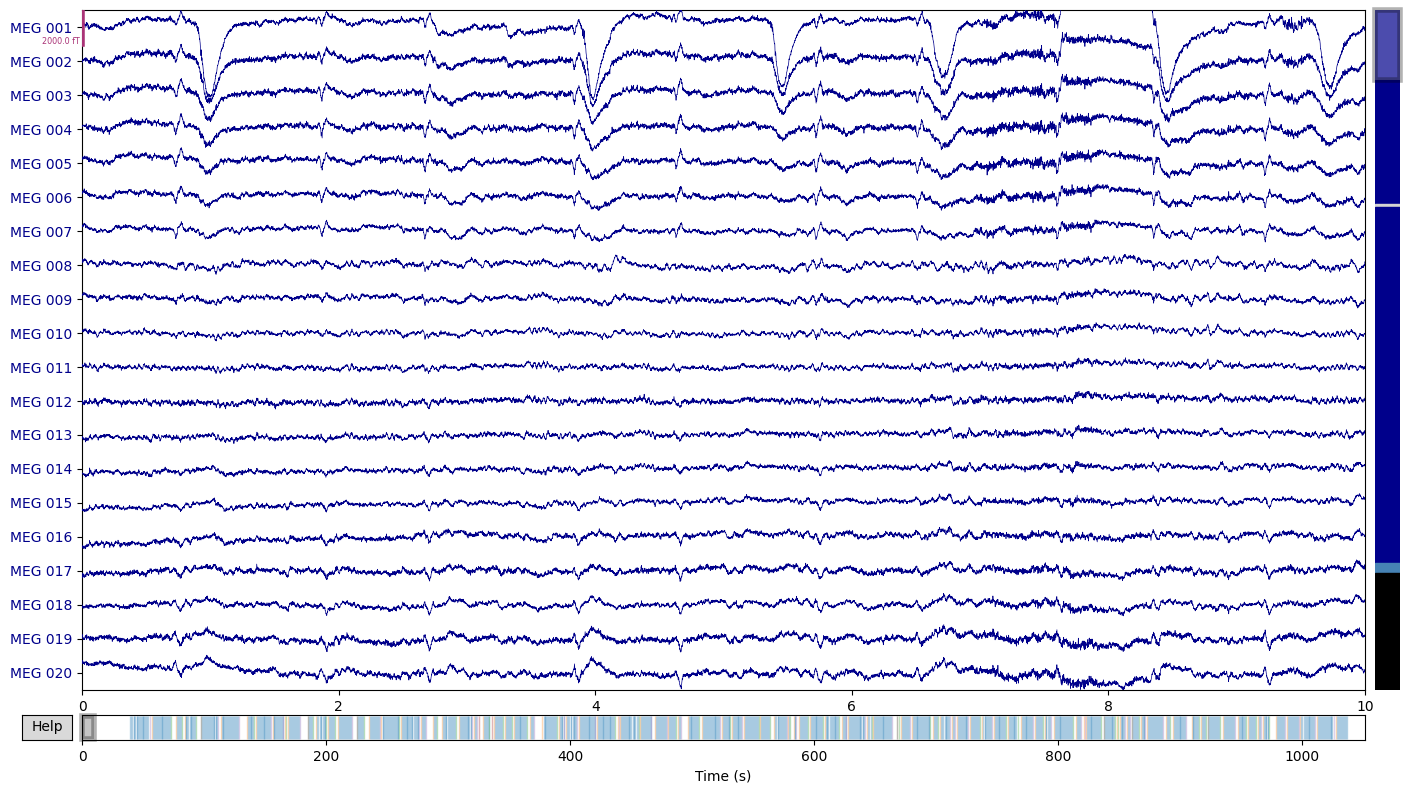

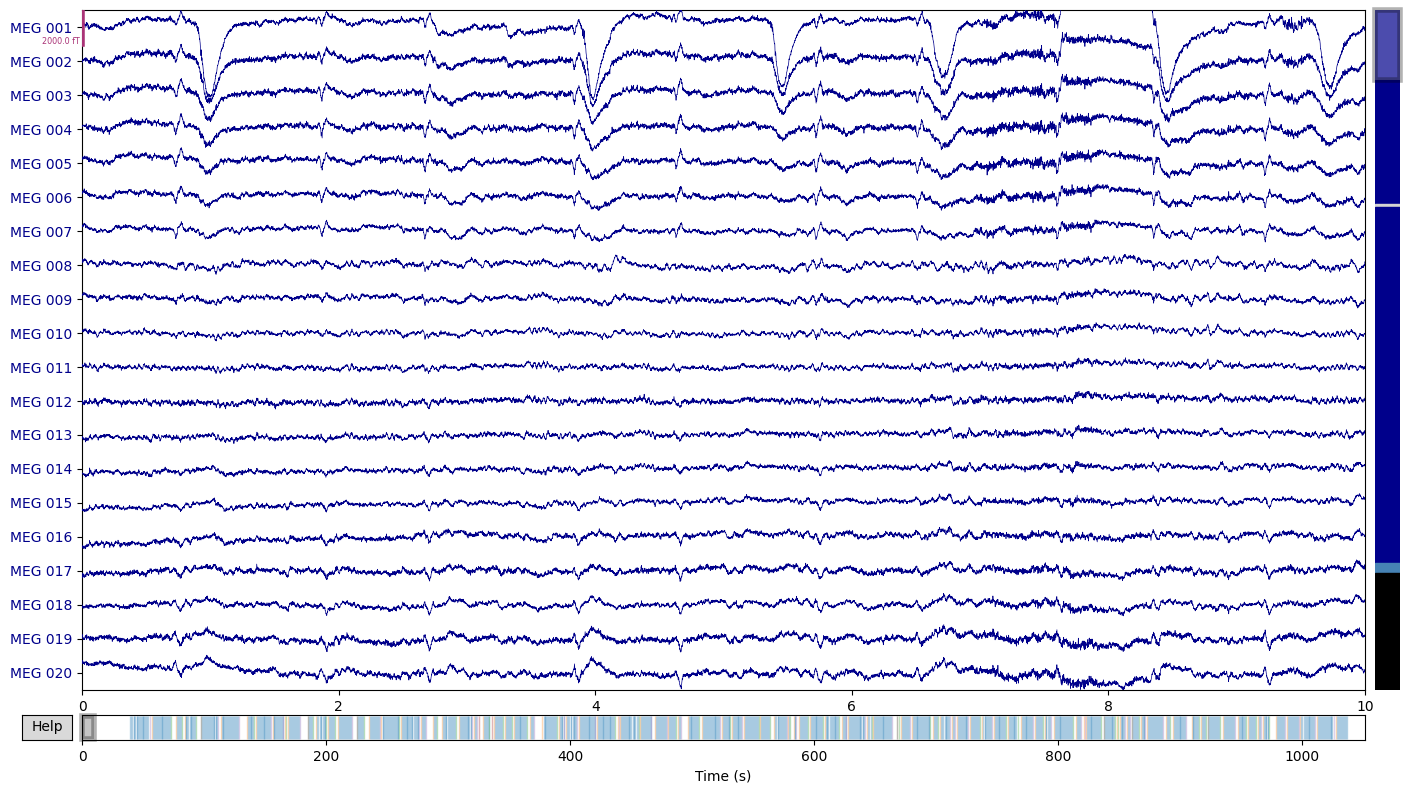

In [13]:
raw.plot()

In [14]:
# drop bad channels
raw.drop_channels(raw.info['bads'])

<Raw | sub-008_task-words_meg.fif, 192 x 1052000 (1052.0 s), ~737 kB, data not loaded>

In [13]:
# # preloading the data
# raw.load_data()
# # filter 1-40 Hz
# raw.filter(1, 40)
# # downsample to 600 Hz
# raw.resample(600)

In [14]:
# raw = raw._getitem(0, return_times=False)
# raw.__dict__.keys()
# raw._raw_extras[0]

# raw = raw.to_data_frame().T.to_numpy()

raw.get_data().shape

ValueError: cannot reshape array of size 74775 into shape (1000,193)

In [2]:
path = './openneuro-aws/ds004276-download/'

datatype = 'meg'
extensions = [".tsv",".json"]  
bids_paths = find_matching_paths(path, datatypes=datatype, extensions=extensions)
bids_path = BIDSPath(root=path, datatype=datatype)
print(bids_path.match())

for i in range(19):

    try:
        # get the raw file of the first subject
        task = 'words'
        suffix = 'meg'
        subject = f'00{i}'

        bids_path_subject = bids_path.update(subject=subject, task=task, suffix=suffix)
        print(bids_path_subject)
        # get the raw data
        raw = read_raw_bids(bids_path=bids_path_subject, verbose=False)

        # perform Indioebdent Component Analysis (ICA)
        ica = mne.preprocessing.ICA(n_components=20, random_state=97, max_iter='auto')
        ica.fit(raw)

        # plot the components
        ica.plot_components()
        


        print(raw.get_data().shape)
    except:
        print(f'Error with subject {i}')

[BIDSPath(
root: openneuro-aws/ds004276-download
datatype: meg
basename: sub-001_task-words_channels.tsv), BIDSPath(
root: openneuro-aws/ds004276-download
datatype: meg
basename: sub-001_task-words_events.tsv), BIDSPath(
root: openneuro-aws/ds004276-download
datatype: meg
basename: sub-001_task-words_meg.fif), BIDSPath(
root: openneuro-aws/ds004276-download
datatype: meg
basename: sub-002_task-words_channels.tsv), BIDSPath(
root: openneuro-aws/ds004276-download
datatype: meg
basename: sub-002_task-words_events.tsv), BIDSPath(
root: openneuro-aws/ds004276-download
datatype: meg
basename: sub-002_task-words_meg.fif), BIDSPath(
root: openneuro-aws/ds004276-download
datatype: meg
basename: sub-003_task-words_channels.tsv), BIDSPath(
root: openneuro-aws/ds004276-download
datatype: meg
basename: sub-003_task-words_events.tsv), BIDSPath(
root: openneuro-aws/ds004276-download
datatype: meg
basename: sub-003_task-words_meg.fif), BIDSPath(
root: openneuro-aws/ds004276-download
datatype: meg
base

/tmp/ipykernel_787/2857772598.py:20: RuntimeWarning: Omitted 573 annotation(s) that were outside data range.
  raw = read_raw_bids(bids_path=bids_path_subject, verbose=False)
/tmp/ipykernel_787/2857772598.py:20: RuntimeWarning: The unit for channel(s) MISC 001, MISC 002, MISC 003, MISC 004, MISC 005, MISC 006, MISC 007, MISC 008, MISC 009, MISC 010, MISC 011, MISC 012, MISC 013, MISC 014, MISC 015, MISC 016, MISC 017, MISC 018, MISC 019, MISC 020, MISC 021, MISC 022, MISC 023, MISC 024, MISC 025, MISC 026, MISC 027, MISC 028, MISC 029, MISC 030, MISC 031, MISC 032, MISC 033, MISC 034, MISC 035 has changed from V to NA.
  raw = read_raw_bids(bids_path=bids_path_subject, verbose=False)
/tmp/ipykernel_787/2857772598.py:20: RuntimeWarning: The unit for channel(s) STI 014 has changed from NA to V.
  raw = read_raw_bids(bids_path=bids_path_subject, verbose=False)


Error with subject 1
openneuro-aws/ds004276-download/sub-002/meg/sub-002_task-words_meg.fif


/tmp/ipykernel_787/2857772598.py:20: RuntimeWarning: The unit for channel(s) MISC 001, MISC 002, MISC 003, MISC 004, MISC 005, MISC 006, MISC 007, MISC 008, MISC 009, MISC 010, MISC 011, MISC 012, MISC 013, MISC 014, MISC 015, MISC 016, MISC 017, MISC 018, MISC 019, MISC 020, MISC 021, MISC 022, MISC 023, MISC 024, MISC 025, MISC 026, MISC 027, MISC 028, MISC 029, MISC 030, MISC 031, MISC 032, MISC 033, MISC 034, MISC 035 has changed from V to NA.
  raw = read_raw_bids(bids_path=bids_path_subject, verbose=False)
/tmp/ipykernel_787/2857772598.py:20: RuntimeWarning: The unit for channel(s) STI 014 has changed from NA to V.
  raw = read_raw_bids(bids_path=bids_path_subject, verbose=False)


(193, 1102000)
openneuro-aws/ds004276-download/sub-003/meg/sub-003_task-words_meg.fif


/tmp/ipykernel_787/2857772598.py:20: RuntimeWarning: The unit for channel(s) MISC 001, MISC 002, MISC 003, MISC 004, MISC 005, MISC 006, MISC 007, MISC 008, MISC 009, MISC 010, MISC 011, MISC 012, MISC 013, MISC 014, MISC 015, MISC 016, MISC 017, MISC 018, MISC 019, MISC 020, MISC 021, MISC 022, MISC 023, MISC 024, MISC 025, MISC 026, MISC 027, MISC 028, MISC 029, MISC 030, MISC 031, MISC 032, MISC 033, MISC 034, MISC 035 has changed from V to NA.
  raw = read_raw_bids(bids_path=bids_path_subject, verbose=False)
/tmp/ipykernel_787/2857772598.py:20: RuntimeWarning: The unit for channel(s) STI 014 has changed from NA to V.
  raw = read_raw_bids(bids_path=bids_path_subject, verbose=False)


(193, 1008000)
openneuro-aws/ds004276-download/sub-004/meg/sub-004_task-words_meg.fif


/tmp/ipykernel_787/2857772598.py:20: RuntimeWarning: The unit for channel(s) MISC 001, MISC 002, MISC 003, MISC 004, MISC 005, MISC 006, MISC 007, MISC 008, MISC 009, MISC 010, MISC 011, MISC 012, MISC 013, MISC 014, MISC 015, MISC 016, MISC 017, MISC 018, MISC 019, MISC 020, MISC 021, MISC 022, MISC 023, MISC 024, MISC 025, MISC 026, MISC 027, MISC 028, MISC 029, MISC 030, MISC 031, MISC 032 has changed from V to NA.
  raw = read_raw_bids(bids_path=bids_path_subject, verbose=False)
/tmp/ipykernel_787/2857772598.py:20: RuntimeWarning: The unit for channel(s) STI 014 has changed from NA to V.
  raw = read_raw_bids(bids_path=bids_path_subject, verbose=False)


(193, 963000)
openneuro-aws/ds004276-download/sub-005/meg/sub-005_task-words_meg.fif


/tmp/ipykernel_787/2857772598.py:20: RuntimeWarning: The unit for channel(s) MISC 001, MISC 002, MISC 003, MISC 004, MISC 005, MISC 006, MISC 007, MISC 008, MISC 009, MISC 010, MISC 011, MISC 012, MISC 013, MISC 014, MISC 015, MISC 016, MISC 017, MISC 018, MISC 019, MISC 020, MISC 021, MISC 022, MISC 023, MISC 024, MISC 025, MISC 026, MISC 027, MISC 028, MISC 029, MISC 030, MISC 031, MISC 032 has changed from V to NA.
  raw = read_raw_bids(bids_path=bids_path_subject, verbose=False)
/tmp/ipykernel_787/2857772598.py:20: RuntimeWarning: The unit for channel(s) STI 014 has changed from NA to V.
  raw = read_raw_bids(bids_path=bids_path_subject, verbose=False)


(193, 1048000)
openneuro-aws/ds004276-download/sub-006/meg/sub-006_task-words_meg.fif


/tmp/ipykernel_787/2857772598.py:20: RuntimeWarning: Omitted 606 annotation(s) that were outside data range.
  raw = read_raw_bids(bids_path=bids_path_subject, verbose=False)
/tmp/ipykernel_787/2857772598.py:20: RuntimeWarning: The unit for channel(s) MISC 001, MISC 002, MISC 003, MISC 004, MISC 005, MISC 006, MISC 007, MISC 008, MISC 009, MISC 010, MISC 011, MISC 012, MISC 013, MISC 014, MISC 015, MISC 016, MISC 017, MISC 018, MISC 019, MISC 020, MISC 021, MISC 022, MISC 023, MISC 024, MISC 025, MISC 026, MISC 027, MISC 028, MISC 029, MISC 030, MISC 031, MISC 032 has changed from V to NA.
  raw = read_raw_bids(bids_path=bids_path_subject, verbose=False)
/tmp/ipykernel_787/2857772598.py:20: RuntimeWarning: The unit for channel(s) STI 014 has changed from NA to V.
  raw = read_raw_bids(bids_path=bids_path_subject, verbose=False)


Error with subject 6
openneuro-aws/ds004276-download/sub-007/meg/sub-007_task-words_meg.fif


/tmp/ipykernel_787/2857772598.py:20: RuntimeWarning: The unit for channel(s) MISC 001, MISC 002, MISC 003, MISC 004, MISC 005, MISC 006, MISC 007, MISC 008, MISC 009, MISC 010, MISC 011, MISC 012, MISC 013, MISC 014, MISC 015, MISC 016, MISC 017, MISC 018, MISC 019, MISC 020, MISC 021, MISC 022, MISC 023, MISC 024, MISC 025, MISC 026, MISC 027, MISC 028, MISC 029, MISC 030, MISC 031, MISC 032 has changed from V to NA.
  raw = read_raw_bids(bids_path=bids_path_subject, verbose=False)
/tmp/ipykernel_787/2857772598.py:20: RuntimeWarning: The unit for channel(s) STI 014 has changed from NA to V.
  raw = read_raw_bids(bids_path=bids_path_subject, verbose=False)


(193, 1036000)
openneuro-aws/ds004276-download/sub-008/meg/sub-008_task-words_meg.fif


/tmp/ipykernel_787/2857772598.py:20: RuntimeWarning: The unit for channel(s) MISC 001, MISC 002, MISC 003, MISC 004, MISC 005, MISC 006, MISC 007, MISC 008, MISC 009, MISC 010, MISC 011, MISC 012, MISC 013, MISC 014, MISC 015, MISC 016, MISC 017, MISC 018, MISC 019, MISC 020, MISC 021, MISC 022, MISC 023, MISC 024, MISC 025, MISC 026, MISC 027, MISC 028, MISC 029, MISC 030, MISC 031, MISC 032 has changed from V to NA.
  raw = read_raw_bids(bids_path=bids_path_subject, verbose=False)
/tmp/ipykernel_787/2857772598.py:20: RuntimeWarning: The unit for channel(s) STI 014 has changed from NA to V.
  raw = read_raw_bids(bids_path=bids_path_subject, verbose=False)


(193, 1052000)
openneuro-aws/ds004276-download/sub-009/meg/sub-009_task-words_meg.fif


/tmp/ipykernel_787/2857772598.py:20: RuntimeWarning: The unit for channel(s) MISC 001, MISC 002, MISC 003, MISC 004, MISC 005, MISC 006, MISC 007, MISC 008, MISC 009, MISC 010, MISC 011, MISC 012, MISC 013, MISC 014, MISC 015, MISC 016, MISC 017, MISC 018, MISC 019, MISC 020, MISC 021, MISC 022, MISC 023, MISC 024, MISC 025, MISC 026, MISC 027, MISC 028, MISC 029, MISC 030, MISC 031, MISC 032 has changed from V to NA.
  raw = read_raw_bids(bids_path=bids_path_subject, verbose=False)
/tmp/ipykernel_787/2857772598.py:20: RuntimeWarning: The unit for channel(s) STI 014 has changed from NA to V.
  raw = read_raw_bids(bids_path=bids_path_subject, verbose=False)


(193, 1031000)
openneuro-aws/ds004276-download/sub-0010/meg/sub-0010_task-words_meg
Error with subject 10
openneuro-aws/ds004276-download/sub-0011/meg/sub-0011_task-words_meg
Error with subject 11
openneuro-aws/ds004276-download/sub-0012/meg/sub-0012_task-words_meg
Error with subject 12
openneuro-aws/ds004276-download/sub-0013/meg/sub-0013_task-words_meg
Error with subject 13
openneuro-aws/ds004276-download/sub-0014/meg/sub-0014_task-words_meg
Error with subject 14
openneuro-aws/ds004276-download/sub-0015/meg/sub-0015_task-words_meg
Error with subject 15
openneuro-aws/ds004276-download/sub-0016/meg/sub-0016_task-words_meg
Error with subject 16
openneuro-aws/ds004276-download/sub-0017/meg/sub-0017_task-words_meg
Error with subject 17
openneuro-aws/ds004276-download/sub-0018/meg/sub-0018_task-words_meg
Error with subject 18


In [16]:
# get the raw file of the first subject
task = 'words'
suffix = 'meg'
subject = '008'

bids_path_subject = bids_path.update(subject=subject, task=task, suffix=suffix)
print(bids_path_subject)
# get the raw data
raw = read_raw_bids(bids_path=bids_path_subject, verbose=False)

print(raw.get_data().shape)

openneuro-aws/ds004276-download/sub-008/meg/sub-008_task-words_meg.fif


/tmp/ipykernel_10959/2041211491.py:9: RuntimeWarning: The unit for channel(s) MISC 001, MISC 002, MISC 003, MISC 004, MISC 005, MISC 006, MISC 007, MISC 008, MISC 009, MISC 010, MISC 011, MISC 012, MISC 013, MISC 014, MISC 015, MISC 016, MISC 017, MISC 018, MISC 019, MISC 020, MISC 021, MISC 022, MISC 023, MISC 024, MISC 025, MISC 026, MISC 027, MISC 028, MISC 029, MISC 030, MISC 031, MISC 032 has changed from V to NA.
  raw = read_raw_bids(bids_path=bids_path_subject, verbose=False)
/tmp/ipykernel_10959/2041211491.py:9: RuntimeWarning: The unit for channel(s) STI 014 has changed from NA to V.
  raw = read_raw_bids(bids_path=bids_path_subject, verbose=False)


(193, 1052000)


In [17]:
mne.find_events(raw, stim_channel='STI 014')
raw

1097 events found
Event IDs: [162 163 166 167]


<Raw | sub-008_task-words_meg.fif, 193 x 1052000 (1052.0 s), ~738 kB, data not loaded>

      Subject   Trial Event_Type      Code       Time   TTime  Uncertainty   
0           8     1.0      Sound  dialogue     2707.0  2678.0          NaN  \
1           8     2.0      Sound   phantom    11731.0  2675.0          NaN   
2           8     3.0      Sound   observe    20926.0  2676.0          NaN   
3           8     4.0      Sound      sect    30287.0  2675.0          NaN   
4           8     5.0      Sound      fest    37642.0  2675.0          NaN   
...       ...     ...        ...       ...        ...     ...          ...   
1189        8  1093.0      Sound  manifest  9944334.0  2675.0          NaN   
1190        8  1094.0      Sound     clove  9953194.0  2675.0          NaN   
1191        8  1095.0      Sound      zest  9960883.0  2675.0          NaN   
1192        8  1096.0      Sound  sediment  9968740.0  2675.0          NaN   
1193        8  1097.0      Sound       shy  9977099.0  2675.0          NaN   

      Duration  ReqTime ReqDur Stim_Type  Pair_Index  
0       

/tmp/ipykernel_10959/1490679704.py:15: RuntimeWarning: Omitted 47 annotation(s) that were outside data range.
  raw2 = raw.copy().set_annotations(annot)
/tmp/ipykernel_10959/1490679704.py:15: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw2 = raw.copy().set_annotations(annot)
/tmp/ipykernel_10959/1490679704.py:20: RuntimeWarning: Omitted 47 annotation(s) that were outside data range.
  raw2 = raw.copy().set_annotations(annot)
/tmp/ipykernel_10959/1490679704.py:20: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw2 = raw.copy().set_annotations(annot)


1 bad epochs dropped


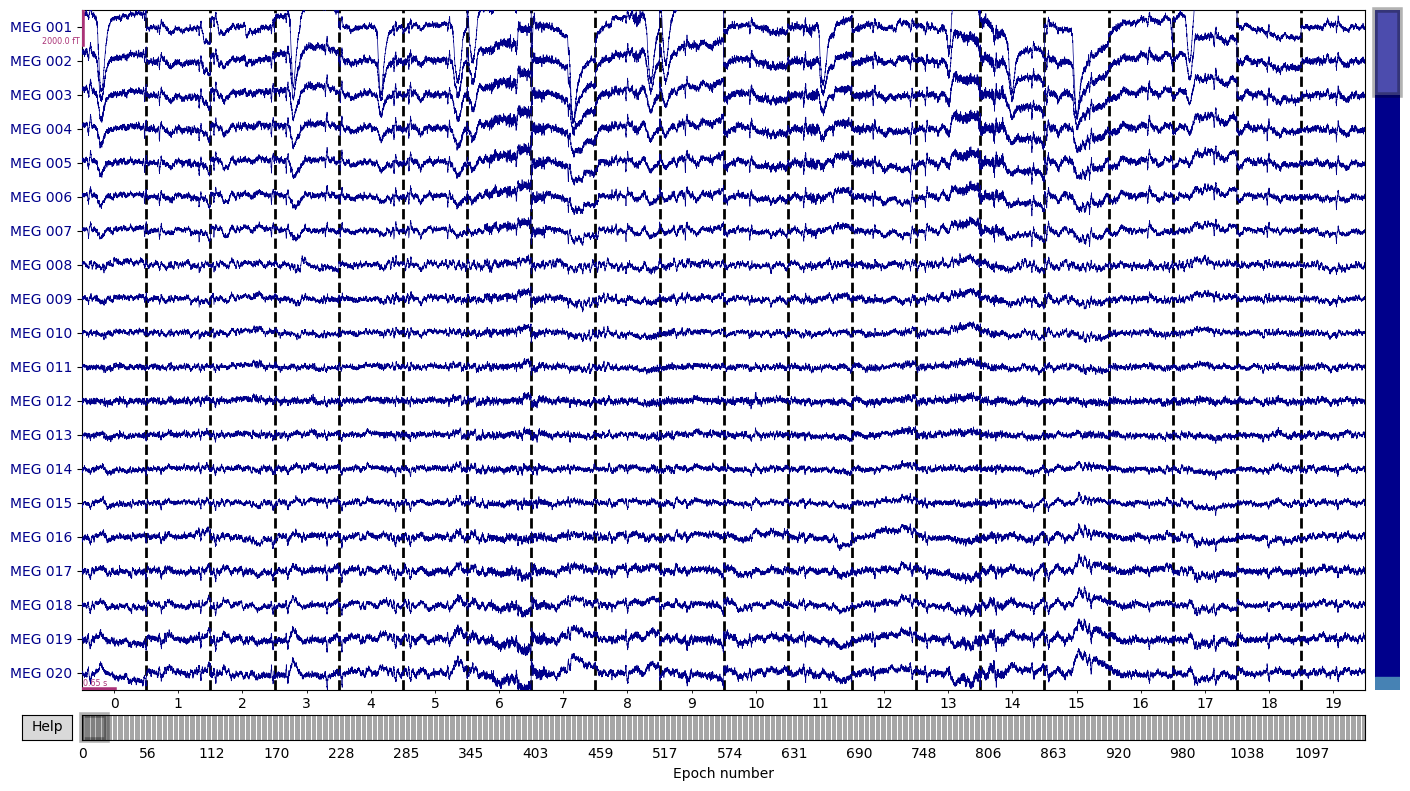

Setting up band-pass filter from 8 - 80 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 80.00 Hz
- Upper transition bandwidth: 20.00 Hz (-6 dB cutoff frequency: 90.00 Hz)
- Filter length: 1651 samples (1.651 s)



/tmp/ipykernel_10959/1490679704.py:45: RuntimeWarning: filter_length (1651) is longer than the signal (1301), distortion is likely. Reduce filter length or filter a longer signal.
  epochs.filter(8, 80)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 168160 out of 168160 | elapsed:   49.0s finished


Applying baseline correction (mode: mean)


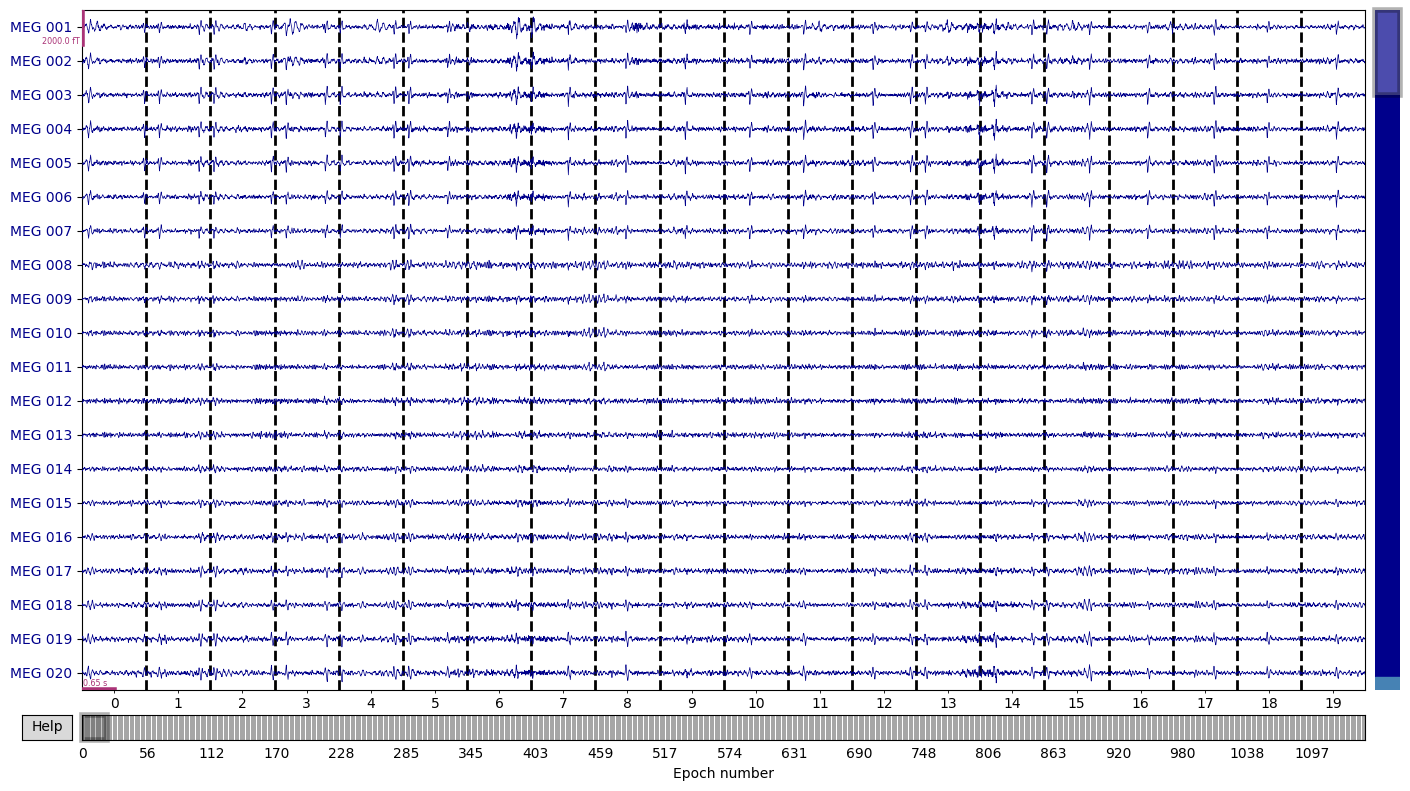

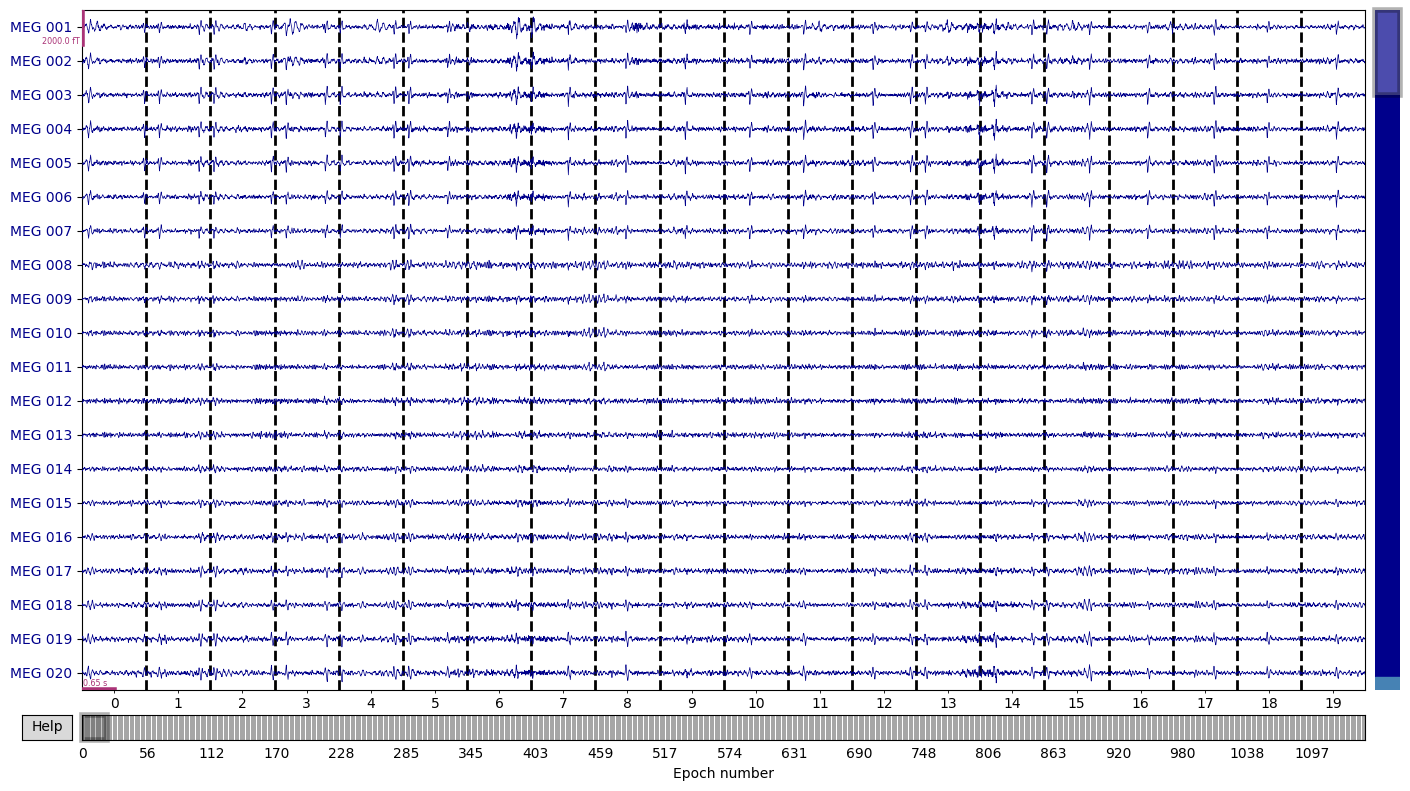

In [57]:
import pandas as pd

# pd.DataFrame()
df = pd.read_csv('./openneuro-aws/ds004276-download/sub-008/beh/sub-008_task-words_beh.tsv', sep='\t')

print(df)

# create annotations
annot = mne.Annotations(
    onset=list(df['Trial']),  # in seconds
    duration=list(df['TTime']/10000),  # in seconds, too
    description=list(df['Code']),
)
print(annot)
raw2 = raw.copy().set_annotations(annot)

# pd.DataFrame(raw2.annotations)


raw2 = raw.copy().set_annotations(annot)

# get events from the annotations
events_from_annot, event_dict = mne.events_from_annotations(raw2)

tmin = -0.4
tmax = 0.9

# epochs # 10 seconds before the onset and 90 seconds after the onset
epochs = mne.Epochs(
                    raw2, 
                    events_from_annot, 
                    event_id=event_dict, 
                    tmin=tmin, 
                    tmax=tmax, 
                    preload=True, 
                    event_repeated='merge'
                )

epochs.plot()

# apply Band-pass filter 
# analyzing alpha oscillations (8-13 Hz)
# analyzing beta oscillations (13-30 Hz) 
# analyzing gamma oscillations (30-80 Hz)
epochs.filter(8, 80)

# apply baseline correction
# subtracting a baseline period 
# from each time point in the data
epochs.apply_baseline((None, 0))

# plot the epochs
epochs.plot()

# # apply ica
# ica = mne.preprocessing.ICA(n_components=20, random_state=97, max_iter='auto')
# ica.fit(epochs)

# # plot the components
# ica.plot_components()



In [60]:
epochs.event_id

{'abroad': 3,
 'absolve': 4,
 'abstain': 5,
 'abstract': 6,
 'absurd': 7,
 'accelerate': 8,
 'achieve': 9,
 'actual': 10,
 'adept': 11,
 'admit': 12,
 'advance': 13,
 'affair': 14,
 'affinity': 15,
 'affirm': 16,
 'afraid': 17,
 'agitate': 18,
 'aisle': 19,
 'alarm': 20,
 'alcohol': 21,
 'ale': 22,
 'algorithm': 23,
 'aloof': 24,
 'altar': 25,
 'alumni': 26,
 'ambiguous': 27,
 'analog': 28,
 'annoy': 29,
 'annual': 30,
 'antique': 31,
 'anvil': 32,
 'apathy': 33,
 'appeal': 34,
 'appreciate': 35,
 'approximate': 36,
 'arbitrary': 37,
 'are': 38,
 'aroma': 39,
 'arrange': 40,
 'arrive': 41,
 'asphalt': 42,
 'aspire': 43,
 'aspirin': 44,
 'associate': 45,
 'assume': 46,
 'athlete': 47,
 'atom': 48,
 'attack': 49,
 'autumn': 50,
 'avail': 51,
 'avalanche': 52,
 'average': 53,
 'awe': 54,
 'awkward': 55,
 'baboon': 56,
 'bait': 57,
 'bake': 58,
 'balcony': 59,
 'banquet': 60,
 'bare': 61,
 'bark': 62,
 'barnacle': 63,
 'barren': 64,
 'basket': 65,
 'batch': 66,
 'bawl': 67,
 'beep': 68,
 '

With this spript I preprocess the data. I pick the brain data of each subject when he is listening a specific word. I store everything into a dictionary and save it into a pickle file.


``` 
    dictionary = {'event': data,
                            ...}

    data (np.array): (number of recorded events, channels, timesteps)
```


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mne
from mne_bids import BIDSPath, read_raw_bids, get_entity_vals, get_datatypes, print_dir_tree, make_report, find_matching_paths
import pickle

mapping_list = {}
mapping_id = []


def get_name_from_id(code, id_map):
    """ Get the name of the event from the event id 

    Args:
        @param code: array of event ids
        @param id_map: event id dictionary

    Returns:
        @return: array of event names
    
    """
    return [key for c in code for key, value in id_map.items() if value == c]




path = './openneuro-aws/ds004276-download/'

datatype = 'meg'
extensions = [".tsv",".json"]  
bids_paths = find_matching_paths(path, datatypes=datatype, extensions=extensions)
bids_path = BIDSPath(root=path, datatype=datatype)
print(bids_path.match())

for i in range(12,19,1):

    if i < 10:
        subject = f'00{i}'
    else:
        subject = f'0{i}'

    print(f'Processing subject {i}')

    try:
        # get the raw file of the first subject
        task = 'words'
        suffix = 'meg'


        bids_path_subject = bids_path.update(subject=subject, task=task, suffix=suffix)
        # print(bids_path_subject)
        # get the raw data
        raw = read_raw_bids(bids_path=bids_path_subject, verbose=False)

        # print(raw.get_data().shape)

        # pd.DataFrame()
        df = pd.read_csv(f'./openneuro-aws/ds004276-download/sub-{subject}/beh/sub-{subject}_task-words_beh.tsv', sep='\t')

        # print(df)

        # create annotations
        annot = mne.Annotations(
            onset=list(df['Trial']),  # in seconds
            duration=list(df['TTime']/10000),  # in seconds, too
            description=list(df['Code']),
        )
        # print(annot)

        raw2 = raw.copy().set_annotations(annot)
        del raw

        # pd.DataFrame(raw2.annotations)

        # get events from the annotations
        events_from_annot, event_dict = mne.events_from_annotations(raw2)

        tmin = -0.1
        tmax = 0.8

        # epochs # 10 seconds before the onset and 90 seconds after the onset
        epochs = mne.Epochs(
                            raw2, 
                            events_from_annot, 
                            event_id=event_dict, 
                            tmin=tmin, 
                            tmax=tmax, 
                            preload=True, 
                            event_repeated='merge'
                        )
        
        del raw2

        # epochs.plot()

        # apply Band-pass filter 
        # analyzing alpha oscillations (8-13 Hz)
        # analyzing beta oscillations (13-30 Hz) 
        # analyzing gamma oscillations (30-80 Hz)
        epochs.filter(4, 80)

        # apply baseline correction
        # subtracting a baseline period 
        # from each time point in the data
        epochs.apply_baseline((None, 0))

        # plot the epochs
        # epochs.plot()

        # # apply ica
        # ica = mne.preprocessing.ICA(n_components=20, random_state=97, max_iter='auto')
        # ica.fit(epochs)

        # # plot the components
        # ica.plot_components()


        id_list = get_name_from_id(epochs.events[:, 2], epochs.event_id)

        for data, id_k in zip(epochs.get_data().astype(np.float32), id_list):
            if id_k in mapping_list:
                mapping_list[id_k] = np.concatenate((mapping_list[id_k], data[None, :]), axis=0)
            else:
                mapping_list[id_k] = data[None, :]

        mapping_id.append(epochs.event_id)

        with open(f'./data/word_recognition_preprocessed_data/sub-{subject}_data.pkl', 'wb') as f:
            pickle.dump(mapping_list, f)

        with open(f'./data/word_recognition_preprocessed_data/sub-{subject}_id.pkl', 'wb') as f:
            pickle.dump(mapping_id, f)

    except:
        print(f'Error with subject {subject}')



[BIDSPath(
root: openneuro-aws/ds004276-download
datatype: meg
basename: sub-001_task-words_channels.tsv), BIDSPath(
root: openneuro-aws/ds004276-download
datatype: meg
basename: sub-001_task-words_events.tsv), BIDSPath(
root: openneuro-aws/ds004276-download
datatype: meg
basename: sub-001_task-words_meg.fif), BIDSPath(
root: openneuro-aws/ds004276-download
datatype: meg
basename: sub-002_task-words_channels.tsv), BIDSPath(
root: openneuro-aws/ds004276-download
datatype: meg
basename: sub-002_task-words_events.tsv), BIDSPath(
root: openneuro-aws/ds004276-download
datatype: meg
basename: sub-002_task-words_meg.fif), BIDSPath(
root: openneuro-aws/ds004276-download
datatype: meg
basename: sub-003_task-words_channels.tsv), BIDSPath(
root: openneuro-aws/ds004276-download
datatype: meg
basename: sub-003_task-words_events.tsv), BIDSPath(
root: openneuro-aws/ds004276-download
datatype: meg
basename: sub-003_task-words_meg.fif), BIDSPath(
root: openneuro-aws/ds004276-download
datatype: meg
base

/tmp/ipykernel_555/185529356.py:54: RuntimeWarning: The unit for channel(s) MISC 001, MISC 002, MISC 003, MISC 004, MISC 005, MISC 006, MISC 007, MISC 008, MISC 009, MISC 010, MISC 011, MISC 012, MISC 013, MISC 014, MISC 015, MISC 016, MISC 017, MISC 018, MISC 019, MISC 020, MISC 021, MISC 022, MISC 023, MISC 024, MISC 025, MISC 026, MISC 027, MISC 028, MISC 029, MISC 030, MISC 031, MISC 032 has changed from V to NA.
  raw = read_raw_bids(bids_path=bids_path_subject, verbose=False)
/tmp/ipykernel_555/185529356.py:54: RuntimeWarning: The unit for channel(s) STI 014 has changed from NA to V.
  raw = read_raw_bids(bids_path=bids_path_subject, verbose=False)
/tmp/ipykernel_555/185529356.py:71: RuntimeWarning: Omitted 154 annotation(s) that were outside data range.
  raw2 = raw.copy().set_annotations(annot)
/tmp/ipykernel_555/185529356.py:71: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw2 = raw.copy().set_annotations(annot)


1 bad epochs dropped
Setting up band-pass filter from 4 - 80 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 80.00 Hz
- Upper transition bandwidth: 20.00 Hz (-6 dB cutoff frequency: 90.00 Hz)
- Filter length: 1651 samples (1.651 s)



/tmp/ipykernel_555/185529356.py:101: RuntimeWarning: filter_length (1651) is longer than the signal (901), distortion is likely. Reduce filter length or filter a longer signal.
  epochs.filter(4, 80)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 152640 out of 152640 | elapsed:   40.6s finished


Applying baseline correction (mode: mean)
Processing subject 13
Used Annotations descriptions: ['1', '2', 'abroad', 'absolve', 'abstain', 'abstract', 'absurd', 'accelerate', 'achieve', 'actual', 'adept', 'admit', 'advance', 'affair', 'affinity', 'affirm', 'afraid', 'agitate', 'aisle', 'alarm', 'ale', 'algorithm', 'aloof', 'altar', 'alumni', 'ambiguous', 'analog', 'annoy', 'annual', 'antique', 'anvil', 'apathy', 'appeal', 'approximate', 'are', 'aroma', 'arrange', 'arrive', 'asphalt', 'aspire', 'aspirin', 'associate', 'assume', 'athlete', 'atom', 'attack', 'autumn', 'avail', 'avalanche', 'average', 'awe', 'awkward', 'baboon', 'bait', 'bake', 'balcony', 'banquet', 'bare', 'bark', 'barnacle', 'barren', 'basket', 'batch', 'bawl', 'beep', 'behave', 'bend', 'bent', 'berserk', 'beta', 'beverage', 'bias', 'bid', 'binge', 'bite', 'bitter', 'blatant', 'bleach', 'bless', 'blight', 'blip', 'blitz', 'blizzard', 'blubber', 'bluff', 'bolster', 'bore', 'born', 'botch', 'bother', 'bounty', 'bovine', 'br

/tmp/ipykernel_555/185529356.py:54: RuntimeWarning: The unit for channel(s) MISC 001, MISC 002, MISC 003, MISC 004, MISC 005, MISC 006, MISC 007, MISC 008, MISC 009, MISC 010, MISC 011, MISC 012, MISC 013, MISC 014, MISC 015, MISC 016, MISC 017, MISC 018, MISC 019, MISC 020, MISC 021, MISC 022, MISC 023, MISC 024, MISC 025, MISC 026, MISC 027, MISC 028, MISC 029, MISC 030, MISC 031, MISC 032 has changed from V to NA.
  raw = read_raw_bids(bids_path=bids_path_subject, verbose=False)
/tmp/ipykernel_555/185529356.py:54: RuntimeWarning: The unit for channel(s) STI 014 has changed from NA to V.
  raw = read_raw_bids(bids_path=bids_path_subject, verbose=False)
/tmp/ipykernel_555/185529356.py:71: RuntimeWarning: Omitted 126 annotation(s) that were outside data range.
  raw2 = raw.copy().set_annotations(annot)
/tmp/ipykernel_555/185529356.py:71: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw2 = raw.copy().set_annotations(annot)


1 bad epochs dropped
Setting up band-pass filter from 4 - 80 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 80.00 Hz
- Upper transition bandwidth: 20.00 Hz (-6 dB cutoff frequency: 90.00 Hz)
- Filter length: 1651 samples (1.651 s)



/tmp/ipykernel_555/185529356.py:101: RuntimeWarning: filter_length (1651) is longer than the signal (901), distortion is likely. Reduce filter length or filter a longer signal.
  epochs.filter(4, 80)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 156800 out of 156800 | elapsed:   39.6s finished


Applying baseline correction (mode: mean)
Processing subject 14
Used Annotations descriptions: ['1', '2', 'abroad', 'absolve', 'abstain', 'abstract', 'absurd', 'accelerate', 'accent', 'achieve', 'actual', 'adept', 'admit', 'advance', 'affair', 'affiliate', 'affinity', 'affirm', 'afraid', 'agitate', 'aisle', 'alarm', 'alcohol', 'ale', 'algorithm', 'aloof', 'altar', 'alumni', 'ambiguous', 'analog', 'annoy', 'annual', 'antique', 'anvil', 'apathy', 'appeal', 'appreciate', 'approximate', 'arbitrary', 'are', 'aroma', 'arrange', 'arrive', 'asphalt', 'aspire', 'aspirin', 'associate', 'assume', 'athlete', 'atom', 'attack', 'autumn', 'avail', 'avalanche', 'average', 'awe', 'awkward', 'baboon', 'bait', 'bake', 'balcony', 'banquet', 'bare', 'bark', 'barnacle', 'barren', 'basket', 'batch', 'bawl', 'beep', 'behave', 'bend', 'bent', 'berserk', 'beta', 'beverage', 'bias', 'bid', 'binge', 'bite', 'bitter', 'blatant', 'bleach', 'bless', 'blight', 'blip', 'blitz', 'blizzard', 'blubber', 'bluff', 'bolster

/tmp/ipykernel_555/185529356.py:54: RuntimeWarning: The unit for channel(s) MISC 001, MISC 002, MISC 003, MISC 004, MISC 005, MISC 006, MISC 007, MISC 008, MISC 009, MISC 010, MISC 011, MISC 012, MISC 013, MISC 014, MISC 015, MISC 016, MISC 017, MISC 018, MISC 019, MISC 020, MISC 021, MISC 022, MISC 023, MISC 024, MISC 025, MISC 026, MISC 027, MISC 028, MISC 029, MISC 030, MISC 031, MISC 032 has changed from V to NA.
  raw = read_raw_bids(bids_path=bids_path_subject, verbose=False)
/tmp/ipykernel_555/185529356.py:54: RuntimeWarning: The unit for channel(s) STI 014 has changed from NA to V.
  raw = read_raw_bids(bids_path=bids_path_subject, verbose=False)
/tmp/ipykernel_555/185529356.py:71: RuntimeWarning: Omitted 41 annotation(s) that were outside data range.
  raw2 = raw.copy().set_annotations(annot)
/tmp/ipykernel_555/185529356.py:71: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw2 = raw.copy().set_annotations(annot)


1 bad epochs dropped
Setting up band-pass filter from 4 - 80 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 80.00 Hz
- Upper transition bandwidth: 20.00 Hz (-6 dB cutoff frequency: 90.00 Hz)
- Filter length: 1651 samples (1.651 s)



/tmp/ipykernel_555/185529356.py:101: RuntimeWarning: filter_length (1651) is longer than the signal (901), distortion is likely. Reduce filter length or filter a longer signal.
  epochs.filter(4, 80)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 169120 out of 169120 | elapsed:   45.8s finished


Applying baseline correction (mode: mean)
Processing subject 15
Used Annotations descriptions: ['1', '2', 'abroad', 'absolve', 'abstain', 'abstract', 'absurd', 'accelerate', 'accent', 'achieve', 'actual', 'adept', 'admit', 'advance', 'affair', 'affiliate', 'affinity', 'affirm', 'afraid', 'agitate', 'aisle', 'alarm', 'alcohol', 'ale', 'algorithm', 'aloof', 'altar', 'alumni', 'ambiguous', 'analog', 'annoy', 'annual', 'antique', 'anvil', 'apathy', 'appeal', 'appreciate', 'approximate', 'arbitrary', 'are', 'aroma', 'arrange', 'arrive', 'asphalt', 'aspire', 'aspirin', 'associate', 'assume', 'athlete', 'atom', 'attack', 'autumn', 'avail', 'avalanche', 'average', 'awe', 'awkward', 'baboon', 'bait', 'bake', 'balcony', 'banquet', 'bare', 'bark', 'barnacle', 'barren', 'basket', 'batch', 'bawl', 'beep', 'behave', 'bend', 'bent', 'berserk', 'beta', 'beverage', 'bias', 'bid', 'binge', 'bite', 'bitter', 'blatant', 'bleach', 'bless', 'blight', 'blip', 'blitz', 'blizzard', 'blubber', 'bluff', 'bolster

/tmp/ipykernel_555/185529356.py:54: RuntimeWarning: The unit for channel(s) MISC 001, MISC 002, MISC 003, MISC 004, MISC 005, MISC 006, MISC 007, MISC 008, MISC 009, MISC 010, MISC 011, MISC 012, MISC 013, MISC 014, MISC 015, MISC 016, MISC 017, MISC 018, MISC 019, MISC 020, MISC 021, MISC 022, MISC 023, MISC 024, MISC 025, MISC 026, MISC 027, MISC 028, MISC 029, MISC 030, MISC 031, MISC 032 has changed from V to NA.
  raw = read_raw_bids(bids_path=bids_path_subject, verbose=False)
/tmp/ipykernel_555/185529356.py:54: RuntimeWarning: The unit for channel(s) STI 014 has changed from NA to V.
  raw = read_raw_bids(bids_path=bids_path_subject, verbose=False)
/tmp/ipykernel_555/185529356.py:71: RuntimeWarning: Omitted 38 annotation(s) that were outside data range.
  raw2 = raw.copy().set_annotations(annot)
/tmp/ipykernel_555/185529356.py:71: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw2 = raw.copy().set_annotations(annot)


1 bad epochs dropped
Setting up band-pass filter from 4 - 80 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 80.00 Hz
- Upper transition bandwidth: 20.00 Hz (-6 dB cutoff frequency: 90.00 Hz)
- Filter length: 1651 samples (1.651 s)



/tmp/ipykernel_555/185529356.py:101: RuntimeWarning: filter_length (1651) is longer than the signal (901), distortion is likely. Reduce filter length or filter a longer signal.
  epochs.filter(4, 80)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 169600 out of 169600 | elapsed:   45.3s finished


Applying baseline correction (mode: mean)
Processing subject 16
Used Annotations descriptions: ['1', '2', 'abroad', 'absolve', 'abstain', 'abstract', 'achieve', 'adept', 'admit', 'advance', 'afraid', 'alarm', 'ale', 'aloof', 'altar', 'ambiguous', 'analog', 'anvil', 'appeal', 'approximate', 'aroma', 'arrive', 'asphalt', 'aspire', 'aspirin', 'associate', 'athlete', 'atom', 'attack', 'autumn', 'avail', 'average', 'awe', 'baboon', 'bait', 'balcony', 'bare', 'bark', 'barnacle', 'barren', 'batch', 'beep', 'behave', 'bend', 'beta', 'beverage', 'bias', 'bid', 'binge', 'bite', 'bitter', 'blatant', 'bleach', 'blitz', 'blubber', 'bluff', 'bolster', 'bore', 'botch', 'bounty', 'bovine', 'braid', 'bran', 'brave', 'brim', 'brittle', 'bruise', 'burst', 'bust', 'cadet', 'cancel', 'cardiac', 'care', 'caribou', 'carnival', 'carton', 'catch', 'cauldron', 'ceiling', 'celery', 'census', 'ceremony', 'challenge', 'chameleon', 'chant', 'charity', 'chart', 'chest', 'chic', 'chime', 'choir', 'chomp', 'chore', 'c

/tmp/ipykernel_555/185529356.py:54: RuntimeWarning: Omitted 306 annotation(s) that were outside data range.
  raw = read_raw_bids(bids_path=bids_path_subject, verbose=False)
/tmp/ipykernel_555/185529356.py:54: RuntimeWarning: The unit for channel(s) MISC 001, MISC 002, MISC 003, MISC 004, MISC 005, MISC 006, MISC 007, MISC 008, MISC 009, MISC 010, MISC 011, MISC 012, MISC 013, MISC 014, MISC 015, MISC 016, MISC 017, MISC 018, MISC 019, MISC 020, MISC 021, MISC 022, MISC 023, MISC 024, MISC 025, MISC 026, MISC 027, MISC 028, MISC 029, MISC 030, MISC 031, MISC 032 has changed from V to NA.
  raw = read_raw_bids(bids_path=bids_path_subject, verbose=False)
/tmp/ipykernel_555/185529356.py:54: RuntimeWarning: The unit for channel(s) STI 014 has changed from NA to V.
  raw = read_raw_bids(bids_path=bids_path_subject, verbose=False)
/tmp/ipykernel_555/185529356.py:71: RuntimeWarning: Omitted 451 annotation(s) that were outside data range.
  raw2 = raw.copy().set_annotations(annot)
/tmp/ipykern

Error with subject 016
Processing subject 17
Used Annotations descriptions: ['1', '2', 'abroad', 'absolve', 'abstain', 'abstract', 'achieve', 'adept', 'admit', 'advance', 'afraid', 'alarm', 'ale', 'aloof', 'altar', 'ambiguous', 'analog', 'anvil', 'appeal', 'approximate', 'aroma', 'arrive', 'asphalt', 'aspire', 'aspirin', 'associate', 'athlete', 'atom', 'attack', 'autumn', 'avail', 'average', 'awe', 'baboon', 'bait', 'balcony', 'bare', 'bark', 'barnacle', 'barren', 'batch', 'beep', 'behave', 'bend', 'beta', 'beverage', 'bias', 'bid', 'binge', 'bite', 'bitter', 'blatant', 'bleach', 'blitz', 'blubber', 'bluff', 'bolster', 'bore', 'botch', 'bounty', 'bovine', 'braid', 'bran', 'brave', 'brim', 'brittle', 'bruise', 'burst', 'bust', 'cadet', 'cancel', 'cardiac', 'care', 'caribou', 'carnival', 'carton', 'catch', 'cauldron', 'ceiling', 'celery', 'census', 'ceremony', 'challenge', 'chameleon', 'chant', 'charity', 'chart', 'chest', 'chic', 'chime', 'choir', 'chomp', 'chore', 'circle', 'circus', '

/tmp/ipykernel_555/185529356.py:54: RuntimeWarning: Omitted 552 annotation(s) that were outside data range.
  raw = read_raw_bids(bids_path=bids_path_subject, verbose=False)
/tmp/ipykernel_555/185529356.py:54: RuntimeWarning: The unit for channel(s) MISC 001, MISC 002, MISC 003, MISC 004, MISC 005, MISC 006, MISC 007, MISC 008, MISC 009, MISC 010, MISC 011, MISC 012, MISC 013, MISC 014, MISC 015, MISC 016, MISC 017, MISC 018, MISC 019, MISC 020, MISC 021, MISC 022, MISC 023, MISC 024, MISC 025, MISC 026, MISC 027, MISC 028, MISC 029, MISC 030, MISC 031, MISC 032 has changed from V to NA.
  raw = read_raw_bids(bids_path=bids_path_subject, verbose=False)
/tmp/ipykernel_555/185529356.py:54: RuntimeWarning: The unit for channel(s) STI 014 has changed from NA to V.
  raw = read_raw_bids(bids_path=bids_path_subject, verbose=False)
/tmp/ipykernel_555/185529356.py:71: RuntimeWarning: Omitted 450 annotation(s) that were outside data range.
  raw2 = raw.copy().set_annotations(annot)
/tmp/ipykern

Error with subject 017
Processing subject 18
Used Annotations descriptions: ['1', '2', 'abroad', 'absolve', 'abstain', 'abstract', 'absurd', 'accelerate', 'accent', 'achieve', 'actual', 'adept', 'admit', 'advance', 'affair', 'affiliate', 'affinity', 'affirm', 'afraid', 'agitate', 'aisle', 'alarm', 'alcohol', 'ale', 'algorithm', 'aloof', 'altar', 'alumni', 'ambiguous', 'analog', 'annoy', 'annual', 'antique', 'anvil', 'apathy', 'appeal', 'appreciate', 'approximate', 'arbitrary', 'are', 'aroma', 'arrange', 'arrive', 'asphalt', 'aspire', 'aspirin', 'associate', 'assume', 'athlete', 'atom', 'attack', 'autumn', 'avail', 'avalanche', 'average', 'awe', 'awkward', 'baboon', 'bait', 'bake', 'balcony', 'banquet', 'bare', 'bark', 'barnacle', 'barren', 'basket', 'batch', 'bawl', 'beep', 'behave', 'bend', 'bent', 'berserk', 'beta', 'beverage', 'bias', 'bid', 'binge', 'bite', 'bitter', 'blatant', 'bleach', 'bless', 'blight', 'blip', 'blitz', 'blizzard', 'blubber', 'bluff', 'bolster', 'bore', 'born', 

/tmp/ipykernel_555/185529356.py:54: RuntimeWarning: The unit for channel(s) MISC 001, MISC 002, MISC 003, MISC 004, MISC 005, MISC 006, MISC 007, MISC 008, MISC 009, MISC 010, MISC 011, MISC 012, MISC 013, MISC 014, MISC 015, MISC 016, MISC 017, MISC 018, MISC 019, MISC 020, MISC 021, MISC 022, MISC 023, MISC 024, MISC 025, MISC 026, MISC 027, MISC 028, MISC 029, MISC 030, MISC 031, MISC 032 has changed from V to NA.
  raw = read_raw_bids(bids_path=bids_path_subject, verbose=False)
/tmp/ipykernel_555/185529356.py:54: RuntimeWarning: The unit for channel(s) STI 014 has changed from NA to V.
  raw = read_raw_bids(bids_path=bids_path_subject, verbose=False)
/tmp/ipykernel_555/185529356.py:71: RuntimeWarning: Omitted 44 annotation(s) that were outside data range.
  raw2 = raw.copy().set_annotations(annot)
/tmp/ipykernel_555/185529356.py:71: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw2 = raw.copy().set_annotations(annot)


1 bad epochs dropped
Setting up band-pass filter from 4 - 80 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 80.00 Hz
- Upper transition bandwidth: 20.00 Hz (-6 dB cutoff frequency: 90.00 Hz)
- Filter length: 1651 samples (1.651 s)



/tmp/ipykernel_555/185529356.py:101: RuntimeWarning: filter_length (1651) is longer than the signal (901), distortion is likely. Reduce filter length or filter a longer signal.
  epochs.filter(4, 80)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 168640 out of 168640 | elapsed:   46.2s finished


Applying baseline correction (mode: mean)


./data/word_recognition_preprocessed_data/sub-12-13-14-15-18_data.pkl
./data/word_recognition_preprocessed_data/sub-2-3-4-5-7-8-9_data.pkl


In [9]:
## re-format the data
import pickle
import numpy as np
import torch
import glob
import os

X = torch.tensor([])
y = torch.tensor([])

with open('./data/word_recognition_preprocessed_data/dataset/words.pkl', 'rb') as f:
    words = pickle.load(f)

words = {w: i for i, w in enumerate(words)}

file_name = glob.glob('./data/word_recognition_preprocessed_data/*_data.pkl')
# f_remove = glob.glob('./data/word_recognition_preprocessed_data/*.pt')
# [os.remove(f) for f in f_remove]

mapping_list = {}

for file in file_name:
    print(file)

    with open(file, 'rb') as f:
        data = pickle.load(f)

    # convert values to float32
    data = {key: value.astype(np.float32) for key, value in data.items()}

    for key, value in data.items():
        try:
            # check if the file exists
            if os.path.exists(f'./data/word_recognition_preprocessed_data/{key}.pt'):
                data_temp = torch.load(f'./data/word_recognition_preprocessed_data/{key}.pt')
                data_temp = torch.cat((data_temp, torch.from_numpy(value)), dim=0)
                torch.save(data_temp, f'./data/word_recognition_preprocessed_data/{key}.pt')
            else:
                torch.save(torch.from_numpy(value), f'./data/word_recognition_preprocessed_data/{key}.pt')

            # if key in mapping_list:
            #     mapping_list[key] = np.concatenate((mapping_list[key], value), axis=0)
            # else:
            #     mapping_list[key] = value 
        except:
            pass
    
    # del data


./data/word_recognition_preprocessed_data/sub-12-13-14-15-18_data.pkl
./data/word_recognition_preprocessed_data/sub-2-3-4-5-7-8-9_data.pkl


In [7]:
!pip install ftfy regex tqdm
!pip install git+https://github.com/openai/CLIP.git

  Using cached ftfy-6.1.1-py3-none-any.whl (53 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 769.9/769.9 kB 12.5 MB/s eta 0:00:00a 0:00:01
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-fcylmpct
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-fcylmpct
  Resolved https://github.com/openai/CLIP.git to commit a9b1bf5920416aaeaec965c25dd9e8f98c864f16
  Preparing metadata (setup.py) ... done
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369370 sha256=c02205e4c449e0caa69bb9c319b73b020996c7371e53dc7be20aa76aabc43f1c
  Stored in directory: /tmp/pip-ephem-wheel-cache-mlwzd889/wheels/c8/e4/e1/11374c111387672fc2068dfbe0d4b424cb9cdd1b2e184a71b5
Successfully built clip


I preprocess the words getting with clip the embeddings. The embedding are stored into a tensor of shape (number of words, embedding size). I store a dictionary with the word and the indexing of them.

In [16]:
# encode the words with clip
import clip
import torch
import os
import glob


device = "cuda" if torch.cuda.is_available() else "cpu"
os.remove('./data/word_recognition_preprocessed_data/word_text_features.pt')
file_name = glob.glob('./data/word_recognition_preprocessed_data/*.pt')
words = [f.split('/')[3].split('.')[0] for f in file_name]

# save the order of the words
with open('./data/word_recognition_preprocessed_data/words.pkl', 'wb') as f:
    pickle.dump(words, f)

    
words = torch.cat([clip.tokenize(w) for w in words]).to(device)

model, preprocess = clip.load("ViT-B/32", device=device)

with torch.no_grad():
    text_features = model.encode_text(words)

text_features /= text_features.norm(dim=-1, keepdim=True)

# save the text features
torch.save(text_features, './data/word_recognition_preprocessed_data/word_text_features.pt')



In [12]:
print(text_features.shape)
print(len(words))

torch.Size([1000, 512])
1000


Here, I load the word isolated response, convert them from float32 to float16 and save them into a te

In [11]:
# load the dictionary with the words

import pickle

with open('./data/word_recognition_preprocessed_data/dataset/words.pkl', 'rb') as f:
    words = pickle.load(f)

words = {w: i for i, w in enumerate(words)}


# load the brain data
import torch

data = torch.tensor([])
y = torch.tensor([])

for w in words:
    print(w)
    data_temp = torch.load(f'./data/word_recognition_preprocessed_data/{w}.pt').to(torch.float16)
    data = torch.cat((data, data_temp), dim=0).to(torch.float16)
    print(data.shape)
    y = torch.cat((y, torch.tensor([words[w]]*data_temp.shape[0]))).to(torch.float16)
    del data_temp

    # save checkpoint
    torch.save(data, './data/word_recognition_preprocessed_data/dataset/X.pt')
    torch.save(y, './data/word_recognition_preprocessed_data/dataset/y.pt')

print(data.shape)

grab
torch.Size([12, 193, 901])
cartoon
torch.Size([24, 193, 901])
summer
torch.Size([36, 193, 901])
font
torch.Size([48, 193, 901])
rove
torch.Size([60, 193, 901])
modern
torch.Size([72, 193, 901])
property
torch.Size([73, 193, 901])
connect
torch.Size([85, 193, 901])
talent
torch.Size([97, 193, 901])
expanse
torch.Size([109, 193, 901])
essence
torch.Size([119, 193, 901])
mahogany
torch.Size([128, 193, 901])
drab
torch.Size([140, 193, 901])
fest
torch.Size([152, 193, 901])
escort
torch.Size([164, 193, 901])
accelerate
torch.Size([176, 193, 901])
optimum
torch.Size([188, 193, 901])
cauldron
torch.Size([200, 193, 901])
bias
torch.Size([212, 193, 901])
grit
torch.Size([224, 193, 901])
riot
torch.Size([236, 193, 901])
fungus
torch.Size([248, 193, 901])
indict
torch.Size([260, 193, 901])
slender
torch.Size([272, 193, 901])
image
torch.Size([284, 193, 901])
geese
torch.Size([296, 193, 901])
sweep
torch.Size([302, 193, 901])
carton
torch.Size([314, 193, 901])
incumbent
torch.Size([326, 193, 

In [12]:
print(torch.load('./data/word_recognition_preprocessed_data/dataset/X.pt').shape)
print(torch.load('./data/word_recognition_preprocessed_data/dataset/y.pt').shape)
print(torch.load('./data/word_recognition_preprocessed_data/abroad.pt').shape)

torch.Size([11226, 193, 901])
torch.Size([11226])
torch.Size([12, 193, 901])


In this cell I load a single isolated word response and I computed the error of converting it from float32 to float16. I found that the error is very small, so I can use float16 to save memory.

In [2]:
import pickle

with open('./data/word_recognition_preprocessed_data/dataset/words.pkl', 'rb') as f:
    words = pickle.load(f)

words = {w: i for i, w in enumerate(words)}


# load the brain data

import torch

data = torch.tensor([])
y = torch.tensor([])

for w in words:
    print(w)
    data_temp = torch.load(f'./data/word_recognition_preprocessed_data/{w}.pt')

    # measure error float32 vs float16
    print(abs(data_temp - data_temp.to(torch.float16)).mean())
    break

print(data_temp.shape)

grab
tensor(2.2569e-05)
torch.Size([6, 386, 1301])


In [6]:
import pickle

with open('./data/word_recognition_preprocessed_data/sub-002-003_data.pkl', 'rb') as f:
    data = pickle.load(f)


print(data.keys())


dict_keys(['dialogue', 'phantom', 'observe', 'sect', 'fest', 'precinct', 'cycle', 'reside', 'wide', 'remedy', 'male', 'shear', 'equity', 'droop', 'trim', 'message', 'run', 'violin', 'staunch', 'organize', '1/probe_coordinate', 'commute', 'deny', 'bore', 'raw', 'ferocious', 'dictate', 'imitate', 'wander', 'lumbar', 'mug', 'easel', 'feud', 'ceiling', 'aroma', 'explode', 'challenge', 'jam', 'finger', 'report', 'foray', '1/probe_exterior', 'stab', 'rate', 'convey', 'vile', 'node', 'beverage', '1/probe_conceive', 'seem', 'knee', 'escort', 'expense', 'inflict', 'orchid', 'knife', 'tactic', 'spur', 'rapt', 'consolidate', 'rally', '1/probe_threat', 'talent', 'torrent', 'bran', 'plot', 'punish', 'gurgle', 'somber', 'grammar', 'stash', 'peril', 'sigh', 'botch', 'electric', 'snip', 'initial', 'cylinder', 'troop', 'share', 'posture', '1/probe_position', 'fog', 'scene', 'pulp', 'connect', 'venture', 'salary', 'swim', 'carnival', 'fray', 'eliminate', 'develop', 'umpire', 'disrupt', 'rinse', 'predica

(386, 1301)

In [8]:
data['phantom'].shape

(386, 1301)

In [9]:
data['sect'].shape

(386, 1301)

In [79]:
print([key for key in list(epochs.event_id.keys())[:10]])
print(df)
print('Events ordered: ',epochs.events[:, 2])
print(epochs.events[:, 2].shape)

['abroad', 'absolve', 'abstain', 'abstract', 'absurd', 'accelerate', 'achieve', 'actual', 'adept', 'admit']
      Subject   Trial Event_Type      Code       Time   TTime  Uncertainty   
0           7     1.0      Sound  dialogue     2707.0  2678.0          NaN  \
1           7     2.0      Sound   phantom    11731.0  2675.0          NaN   
2           7     3.0      Sound   observe    20925.0  2675.0          NaN   
3           7     4.0      Sound      sect    30454.0  2675.0          NaN   
4           7     5.0      Sound      fest    37809.0  2675.0          NaN   
...       ...     ...        ...       ...        ...     ...          ...   
1189        7  1093.0      Sound  manifest  9829617.0  2675.0          NaN   
1190        7  1094.0      Sound     clove  9838644.0  2675.0          NaN   
1191        7  1095.0      Sound      zest  9846334.0  2675.0          NaN   
1192        7  1096.0      Sound  sediment  9854191.0  2675.0          NaN   
1193        7  1097.0      Sound  

In [67]:
epochs.get_data().shape

(1035, 193, 1301)

Not setting metadata
1051 matching events found
No baseline correction applied
0 projection items activated


/tmp/ipykernel_10959/3568968556.py:1: RuntimeWarning: More events than default colors available. You should pass a list of unique colors.
  ica.plot_sources(epochs)


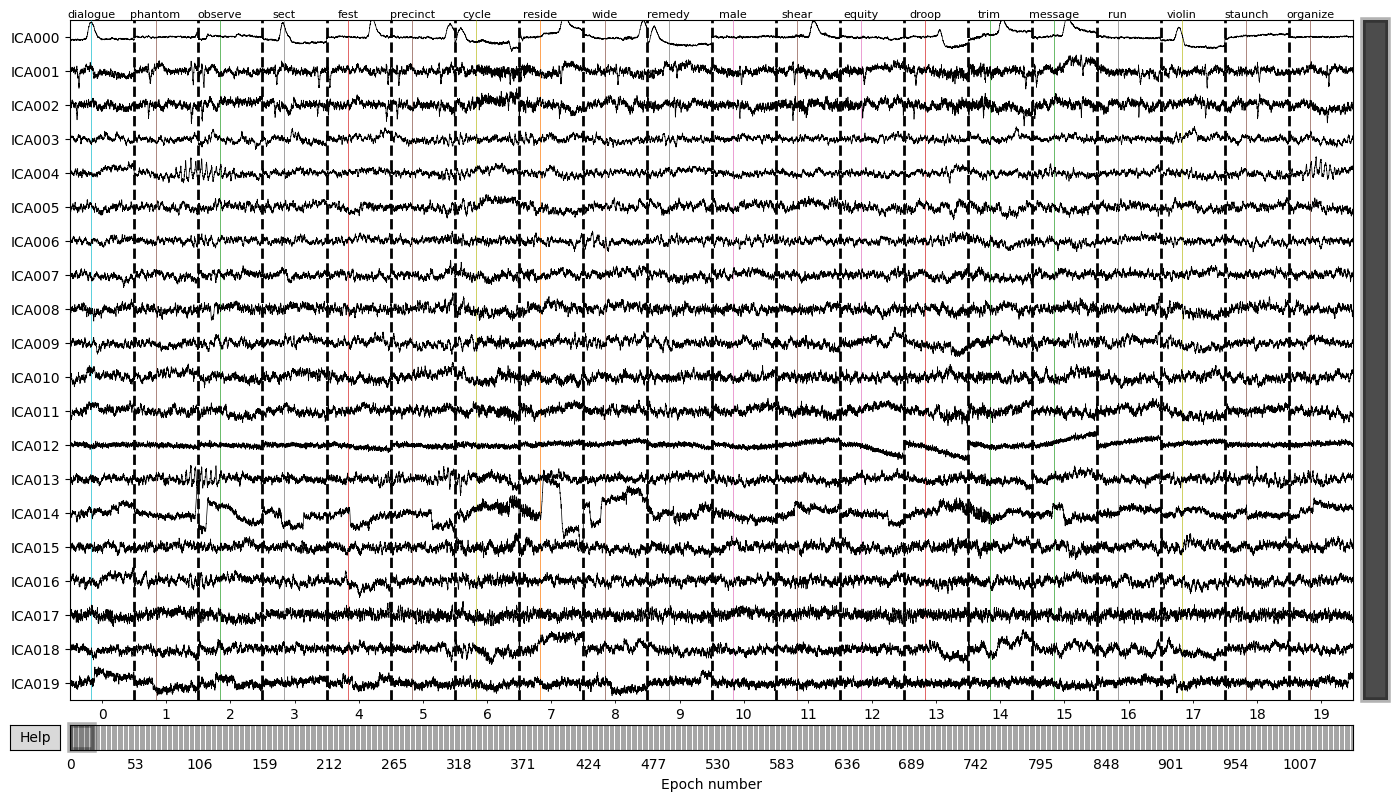

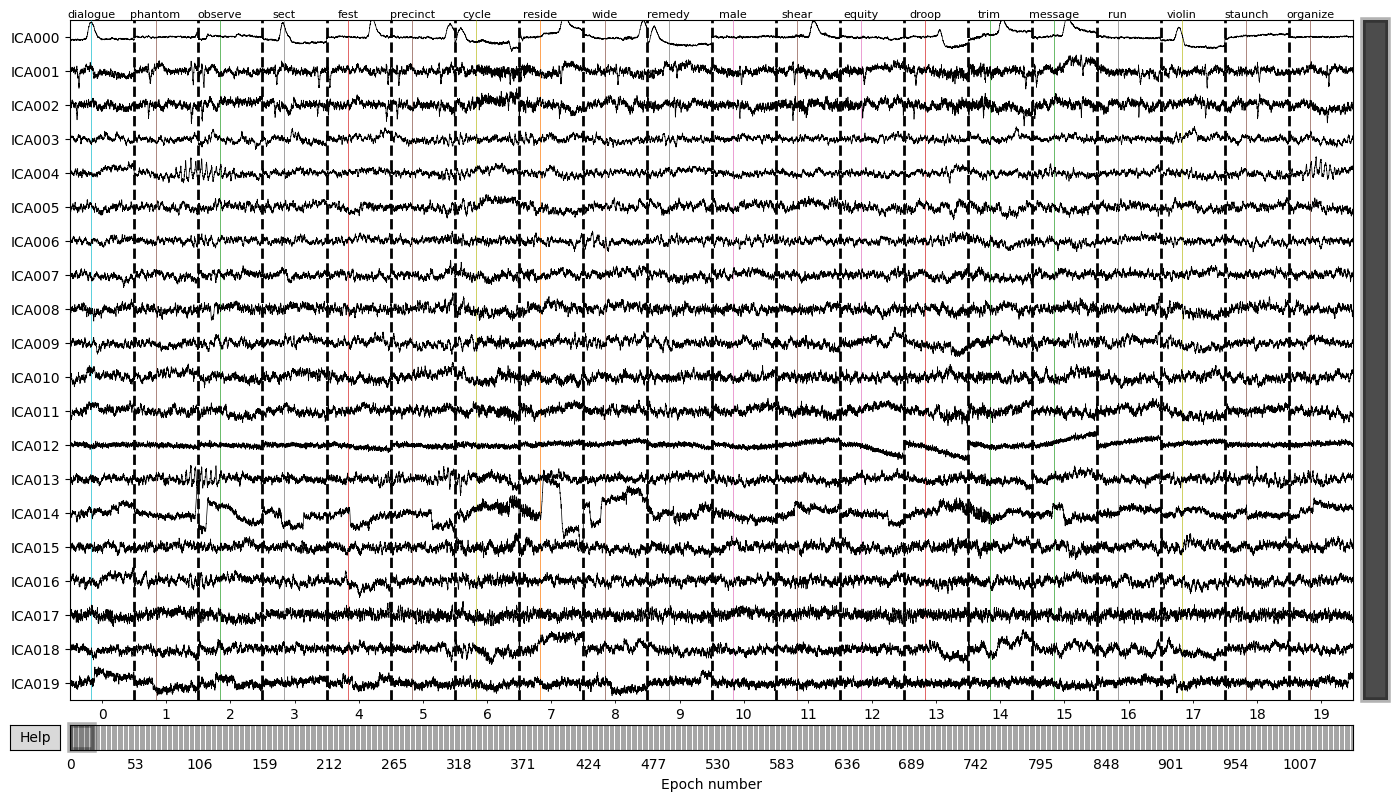

In [32]:
ica.plot_sources(epochs)

In [39]:
!pip install matplotlib-backend-notcurses

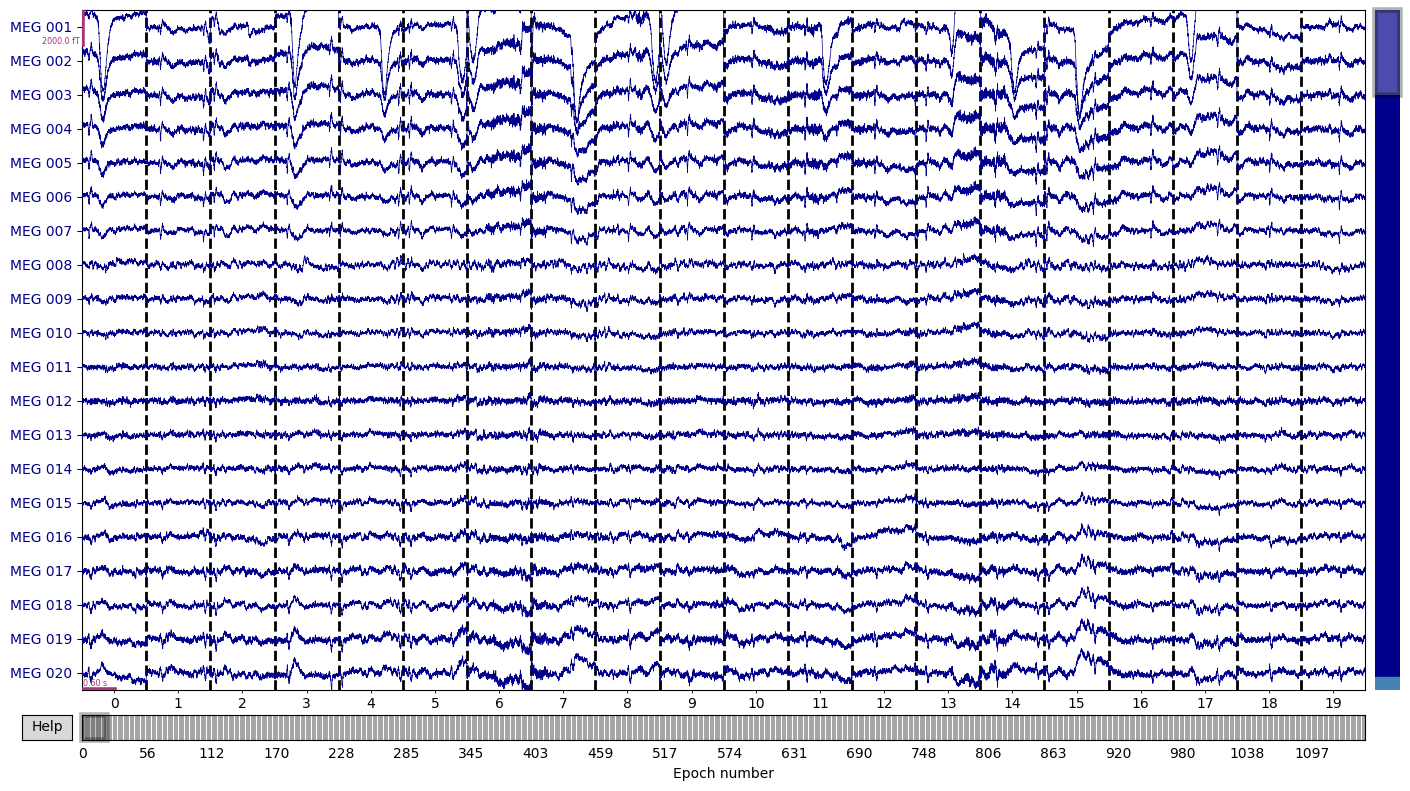

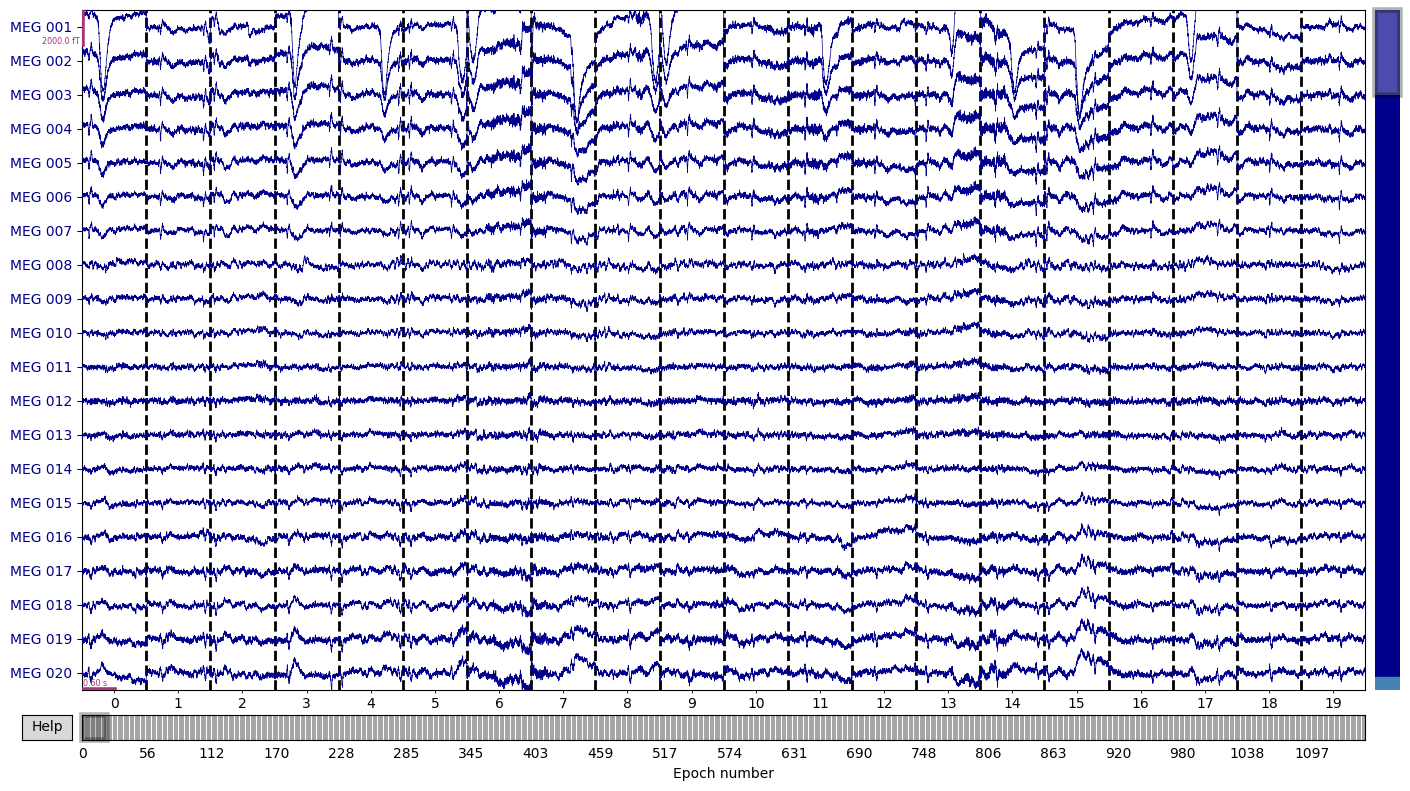

In [38]:
epochs.plot()

In [35]:
ica.get_components().shape

(156, 20)

In [37]:
epochs.get_data().shape

(1051, 193, 1201)

In [53]:
print('Number of items: ',len([list(item.items())[2][1] for item in list(epochs.annotations)]))
items = [list(item.items())[2][1] for item in list(epochs.annotations)]

# create a dictionary with the id of the items
id_map ={}
for value, key in enumerate(items):
    id_map[key] = value

id_map

Number of items:  1147


{'dialogue': 0,
 'phantom': 1,
 'observe': 2,
 'sect': 3,
 'fest': 4,
 'precinct': 5,
 'cycle': 6,
 'reside': 7,
 'wide': 8,
 'remedy': 9,
 'male': 10,
 'shear': 11,
 'equity': 12,
 'droop': 13,
 'trim': 14,
 'message': 15,
 'run': 16,
 'violin': 17,
 'staunch': 18,
 'organize': 19,
 'probe_coordinate': 20,
 '2': 1131,
 'commute': 22,
 'deny': 23,
 'bore': 24,
 'raw': 25,
 'ferocious': 26,
 'dictate': 27,
 'imitate': 28,
 'wander': 29,
 'lumbar': 30,
 'mug': 31,
 'easel': 32,
 'feud': 33,
 'ceiling': 34,
 'aroma': 35,
 'explode': 36,
 'challenge': 37,
 'jam': 38,
 'finger': 39,
 'report': 40,
 'foray': 41,
 'probe_exterior': 42,
 '1': 1145,
 'stab': 44,
 'rate': 45,
 'convey': 46,
 'vile': 47,
 'node': 48,
 'beverage': 49,
 'probe_conceive': 50,
 'seem': 52,
 'knee': 53,
 'escort': 54,
 'expense': 55,
 'inflict': 56,
 'orchid': 57,
 'knife': 58,
 'tactic': 59,
 'spur': 60,
 'rapt': 61,
 'consolidate': 62,
 'rally': 63,
 'probe_threat': 64,
 'talent': 66,
 'torrent': 67,
 'bran': 68,
 '

In [42]:
# raw2.event_id = df[]

# mne.find_events(raw2, stim_channel='STI 014')

elem = dict()
for i, element in enumerate(list(df['Code'].unique())):
    elem[i] = element

elem


{0: 'dialogue',
 1: 'phantom',
 2: 'observe',
 3: 'sect',
 4: 'fest',
 5: 'precinct',
 6: 'cycle',
 7: 'reside',
 8: 'wide',
 9: 'remedy',
 10: 'male',
 11: 'shear',
 12: 'equity',
 13: 'droop',
 14: 'trim',
 15: 'message',
 16: 'run',
 17: 'violin',
 18: 'staunch',
 19: 'organize',
 20: 'probe_coordinate',
 21: '2',
 22: 'commute',
 23: 'deny',
 24: 'bore',
 25: 'raw',
 26: 'ferocious',
 27: 'dictate',
 28: 'imitate',
 29: 'wander',
 30: 'lumbar',
 31: 'mug',
 32: 'easel',
 33: 'feud',
 34: 'ceiling',
 35: 'aroma',
 36: 'explode',
 37: 'challenge',
 38: 'jam',
 39: 'finger',
 40: 'report',
 41: 'foray',
 42: 'probe_exterior',
 43: '1',
 44: 'stab',
 45: 'rate',
 46: 'convey',
 47: 'vile',
 48: 'node',
 49: 'beverage',
 50: 'probe_conceive',
 51: 'seem',
 52: 'knee',
 53: 'escort',
 54: 'expense',
 55: 'inflict',
 56: 'orchid',
 57: 'knife',
 58: 'tactic',
 59: 'spur',
 60: 'rapt',
 61: 'consolidate',
 62: 'rally',
 63: 'probe_threat',
 64: 'talent',
 65: 'torrent',
 66: 'bran',
 67: '